## Machine Learning Lab Final Project 
Sicheng Zhou, University of San Francisco

In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer

In [6]:
import imblearn
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [60]:
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

## Research Question

Could we build a model to predict the probability that a credit card customer is going to churn?

## Dataset Description

Here is the [dataset](https://www.kaggle.com/sakshigoyal7/credit-card-customers). This dataset contains 10,127 customers' information including age, salary, etc. There are 1627 Customers who have churned. Other 8500 customers are not churned. So this is a very unbalanced dataset. If we set a baseline model predicting every customer as not churned, there is 83.9% to be right. As as result, our model must beat that baseline.

Fortunately, the data has no missing values. There are 19 feature columns and 1 target column. Among the features columns, there are 5 categorical columns: Gender, Educational_Level, Martial_Status, Income_Category, and Card_Category.

Load Data
-----

In [10]:
selected_cols = [
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
]

In [11]:
df = pd.read_csv("data/BankChurners.csv")
df = df[selected_cols]

In [12]:
df.head().T

,0,1,2,3,4
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21
Total_Relationship_Count,5,6,4,3,5


## Target Engineering
The target column we want to predict is "Attrition_Flag", which is a categorical variable with options "Existing Customer" and "Attritied Customer". We encode "Existing Customer" as 0 and "Attrited Customer" as 1. Then save this column to df_y, leaving other columns as df_X, which will be pre-processed through a Pipeline.

In [13]:
df['Y'] = df['Attrition_Flag'].apply(lambda x: int(x=="Attrited Customer"))

In [14]:
df_X = df.drop(columns=["Attrition_Flag", "Y"])
df_y = df[['Y']]

In [15]:
df_X.head().T

,0,1,2,3,4
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21
Total_Relationship_Count,5,6,4,3,5
Months_Inactive_12_mon,1,1,1,4,1


In [16]:
df_y.head()

,Y
0,0
1,0
2,0
3,0
4,0


## Feature Engineering

We use two Pipelines to process categorical variables and numeric variables. There are five categorical variables: Gender, Education_Level, Marital_Status, Income_Category, Card_Category. Note that Income_Category is ordinal. However, we still treat it as categorical variable. We transform categorical variables using OneHotEncoder, dropping one of the categories per feature to avoid collinearity. We transform numerical variables to normaly distributed using QuantileTransformer because converting a numerical column to normally distribution could achieve better score.

In [17]:
cat_cols = (df_X.dtypes == object)
num_cols = ~cat_cols

In [18]:
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='error', drop='first'))
])

In [19]:
num_pipe = Pipeline([
    ('qt', QuantileTransformer(output_distribution='normal'))
])

In [20]:
pre_pipe = ColumnTransformer([
    ('categorical', cat_pipe, cat_cols),
    ('numerical',   num_pipe, num_cols)
])

## Fit a base model

We already set a baseline model predicting every customer as not churned, there is 83.9% to be right. However, this dataset is hight unbalanced. We want to fit another baseline model without balancing the data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, 
    df_y, 
    test_size=0.2, 
    shuffle=True,
    stratify=df_y
)

In [22]:
base_pipe = make_pipeline(
    pre_pipe,
    LogisticRegression(
        solver='liblinear',
        class_weight=None
    )
)

In [23]:
base_pipe.fit(X_train.values, y_train["Y"].values)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Customer_Age                False
Gender                       True
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category                True
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12...
Card_Category               False
Months_on_book               True
Total_Relationship_Count     True
Months_Inactive_12_mon       True
Contacts_Count_12_mon        True
Credit_Limit                 True
Total_Revolving_Bal          True
Avg_Open_To_Buy              True
Total_Amt_Chng_Q4_Q1         True
Total_T

In [24]:
base_pred = base_pipe.predict(X_test.values)

In [25]:
base_accuracy = balanced_accuracy_score(y_test.values, base_pred)
base_accuracy

0.7888111065888843

Since we used balanced_accuracy_score for the classifier, we must also calculate a balanced accuracy score for the first baseline model predicting everything as "not churned", that is, 0. According to sklearn official documentation, 
>The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
>

In [26]:
zeros_pred = np.zeros(len(y_test))

In [27]:
zeros_accuracy = balanced_accuracy_score(y_test.values, zeros_pred)
zeros_accuracy

0.5

So our baseline Logistic Classifier performs better than simply predicting everything to be 0. Next, we will deal with the imbalancing dataset to see if we could get better model

## Methods to deal with imbalanced data

- Sometimes we could simply ignore class imbalances because most real-world data is imbalanced. Small differences at larget scale might not effect business outcomes. If the imbalance is not serious, we could ignore it. However, in this project, the imbalance of data could not be ignored.
- We could get more data for the minority group. 
- The most practical way in this project is to resample the data. For example, over-sample minority group, under-sample majority group, representative sampling of both groups and synthetically generate samples from minority class(SMOTE). In this project, we use SMOTE. SMOTE synthesises new minority instances between existing minority instances. In the intuitive picture below, SMOTE synthetic minority instances somewhere on these lines.
- We should pick an appropriate evaluation metrics, especially avoiding accuracy. We could apply balanced_accuracy_score in this project.
- Use robust algorithms. For example, Support Vector Machine, which finds a hyperplan that maximizes the margin. We only needs very few "support vectors" thus minimizing the impact of imbalanced data.

![](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_2.png)

image from: https://rikunert.com/SMOTE_explained

## Models

In [28]:
models = [
    LogisticRegression(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

In [29]:
def pipe_4_model(model):
    pipe_4_model = make_pipeline(   
        pre_pipe,
        imblearn.over_sampling.SMOTE(k_neighbors=50),
        model
    )
    return pipe_4_model

In [30]:
pipes = [pipe_4_model(model) for model in models]

- We could use pipes[index].get_params().keys() to get model names

## Model Hyper Parameters

In [31]:
# for LogisticRegression model, we set l1_ratio to find a mid-point
# between l1 and l2 regularization
lr_params = dict(
    logisticregression__penalty=['elasticnet'],
    logisticregression__solver=['saga'],
    logisticregression__l1_ratio=[0, 0,1, 0.3, 0.5, 0.7, 0.9, 1]
)

In [32]:
# for RidgeClassifier, alpha is important for regularization
rc_params = dict(
    ridgeclassifier__alpha=[0.1, 1, 10, 100, 1000]
)

In [33]:
# for SGDClassifier, l1_ratio still controls the balance
# between l1 and l2 regularization
# We should set early stoppint as True to prevent overfitting
sgd_params = dict(
    
    sgdclassifier__l1_ratio=[0, 0,1, 0.3, 0.5, 0.7, 0.9, 1],
    sgdclassifier__early_stopping=[True],
)

In [34]:
# for Support Vector Machine, the kernel is important
# different kernel defines different method to transform data
svc_params = dict(
    svc__C=[0.1, 0.3, 0.5, 1, 10, 100],
    svc__kernel=['linear', 'poly', 'rbf', 'sigmoid'],
    svc__gamma=[0.1, 1, 10, 100, 1000]
)

In [35]:
# for RandomForestClassifier, n_estimators is the number of decision trees
# if n_estimator is high, it tends to overfitting
# max_depth is the max depth of each tree, if high, it tends to overfitting
# max_feature is the max features each tree use. We do not use all the features 
# to prevent overfitting
rfc_params = dict(
    randomforestclassifier__n_estimators=[70, 80, 90, 100, 110, 120, 130, 140],
    randomforestclassifier__max_depth=[8, 20, 22, 30, 50],
    randomforestclassifier__max_features=[18, 17, 15]
)

In [36]:
# for AdaBoostClassifier, n_estimators is still the number of estimators
abc_params = dict(
    adaboostclassifier__n_estimators=[10, 20, 30, 40, 50, 70, 100],
)

In [37]:
# for ExtraTreesClassifier, n_estimators is still the number of estimators
# n_depth is the maximum depth of the tree
et_params = dict(
    extratreesclassifier__n_estimators = [5, 10, 50, 100, 200, 300, 400, 500],
    extratreesclassifier__max_depth = [range(2,30), None],
    extratreesclassifier__min_samples_split = range(1,10),
    extratreesclassifier__min_samples_leaf = range(1,10),
    extratreesclassifier__max_features = ['auto', 'sqrt', 'log2'],
    extratreesclassifier__warm_start = [True, False],   
)

In [38]:
params = [
    lr_params,
    rc_params,
    sgd_params,
    svc_params,
    rfc_params,
    abc_params,
    et_params
]

## Search Parameter Space

- We use Randomized Search strategy to select the best model. Usually this strategy is faster than Grid Search. 
- We use cross validation with 3 folds. 
- We use different metrics: balanced_accuracy_score and f1 score. Both of them are suitable in a unbalanced dataset.
- balanced_accuracy_score gives the accuracy.
- f1 score gives the harmonic average of precision and recall. 

In [39]:
balanced_scorer = make_scorer(balanced_accuracy_score)
f1_scorer = make_scorer(f1_score)

In [43]:
best_models = []
best_params = []
best_scores = []

In [47]:
for index in range(len(models)):
    for score in [balanced_scorer, f1_scorer]:
        model_family = models[index].__class__.__name__
        pipe = pipes[index]
        search_space = params[index]

        cross_valid = RandomizedSearchCV(
            estimator = pipe,
            param_distributions = search_space,
            n_iter = 10,
            cv = 3,
            scoring = score,
            n_jobs = -1,
            verbose = -1
        )

        best_model = cross_valid.fit(X_train.values, y_train["Y"].values)
        best_param = cross_valid.best_params_
        best_score = cross_valid.best_score_

        best_models.append(best_model)
        best_params.append(best_param)
        best_scores.append(best_score)

        print(f"index={index}, {model_family}: {best_score}, metrics={score._score_func.__name__}")



## Fit the best model

- From the training process above, the best model should be RandomForestClassifier, for both balanced_accuracy_score and f1_score.
- Here are the parameters of random forest classifier:

In [48]:
print(best_params[8])

{'randomforestclassifier__n_estimators': 140, 'randomforestclassifier__max_features': 15, 'randomforestclassifier__max_depth': 50}


In [49]:
best_pipe = make_pipeline(   
    pre_pipe,
    imblearn.over_sampling.SMOTE(k_neighbors=50),
    RandomForestClassifier(
        n_estimators = 140,
        max_features = 15,
        max_depth = 50
    )
)

In [50]:
best_pipe.fit(X_train.values, y_train["Y"].values)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Customer_Age                False
Gender                       True
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category                True
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12...
Months_Inactive_12_mon       True
Contacts_Count_12_mon        True
Credit_Limit                 True
Total_Revolving_Bal          True
Avg_Open_To_Buy              True
Total_Amt_Chng_Q4_Q1         True
Total_Trans_Amt              True
Total_Trans_Ct               True
Total_Ct_Chng_Q4_Q1          True
Avg_Uti

In [51]:
best_pred = best_pipe.predict(X_test.values)

In [52]:
balanced_accuracy_score(y_test["Y"].values, best_pred)

0.9349649527427305

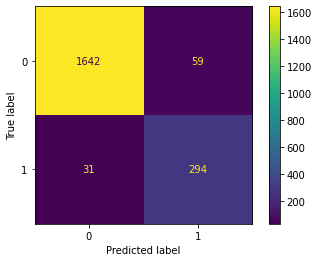

In [53]:
plot_confusion_matrix(best_pipe, X_test, y_test)  

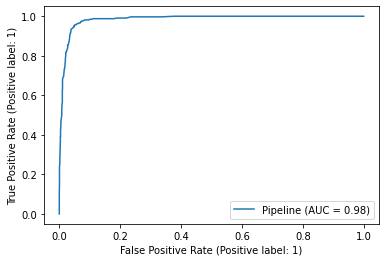

In [54]:
plot_roc_curve(best_pipe, X_test, y_test)  

In [55]:
f1_score(y_test["Y"].values, best_pred)

0.8672566371681416

In [61]:
precision_score(y_test["Y"].values, best_pred)

0.8328611898016998

In [62]:
recall_score(y_test["Y"].values, best_pred)

0.9046153846153846

## Conclusion

### Best final model

In [58]:
RandomForestClassifier(
        n_estimators = 140,
        max_features = 15,
        max_depth = 50
)

RandomForestClassifier(max_depth=50, max_features=15, n_estimators=140)

- max_depth=50
- max_features=15
- n_estimators=140

### Best pipe

In [59]:
best_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Customer_Age                False
Gender                       True
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category                True
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12...
Months_Inactive_12_mon       True
Contacts_Count_12_mon        True
Credit_Limit                 True
Total_Revolving_Bal          True
Avg_Open_To_Buy              True
Total_Amt_Chng_Q4_Q1         True
Total_Trans_Amt              True
Total_Trans_Ct               True
Total_Ct_Chng_Q4_Q1          True
Avg_Uti

### Metrics of best model

### Why Random Forest?

Random Forest is a collection of Decision Trees. Each tree sees a subset of data and a subset of features. Since we use SMOTE to synthesize minority data, it does not affect the partition of data of each trees. That is why Support Vector Machine also works well.

### Summary

In this project, we build a model to predict which customer is possibly going to churn. The dataset is highly unbalanced so after one hot coding categorical variables and transforming numerical variables to normal distribution, we use SMOTE to synthesis more minority data. After trying different models with corresponding hyperparameters, the winner is DecisionTreeModel. This final model has very good recall score, meaning, it could identify the churners effectively. This is significantly important to our business problem. Because if we could identify the possible churners, we could make special plans to prevent them from churning, thus reducing the loss of customers of the business owner.

### Future

- We could further imporve the recall score.
- Explore feature importance to identify which variable affects the possible churning most.